In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


In [67]:
#reads in the data and turns the dataframe into a list
starData = pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')
starData = starData.values.tolist()
print(starData[1])

[3042, 0.0005, 0.1542, 16.6, 0, 'Red', 'M']


In [68]:
# creates and gets the columns
magnitude = []
temp = []
starClass = []
for row in starData:
    magnitude.append(row[3])
    temp.append(row[0])
    starClass.append(row[6])

#calculates bounds of habitable zones and creates two lists for the upper and lower bounds

upperHabitable = []
lowerHabitable = []
for row in starData: 
    upperHabitable.append(pow(row[1], 0.5) * 1.37)
    lowerHabitable.append(pow(row[1], 0.5) * 0.95)
    
# creates 2d table of the parameters sorted by class

allClasses = ['O','B','A','F','G','K','M']
sortedMagnitude = []
sortedTemp = []
sortedUpper = [] 
sortedLower = []

for star in allClasses:
    newMagnitude = []
    newTemp = []
    newUpper = []
    newLower = []
    for i in range(len(starClass)):
        if starClass[i] == star:
            newMagnitude.append(magnitude[i])
            newTemp.append(temp[i])
            newUpper.append(upperHabitable[i])
            newLower.append(lowerHabitable[i])
    
    sortedMagnitude.append(newMagnitude)
    sortedTemp.append(newTemp)
    sortedUpper.append(newUpper)
    sortedLower.append(newLower)




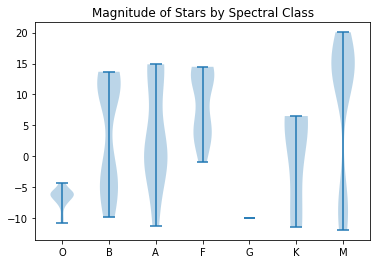

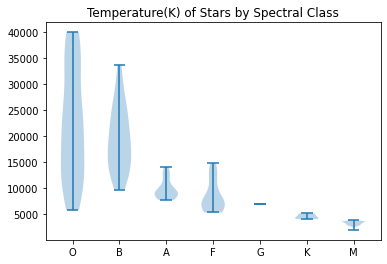

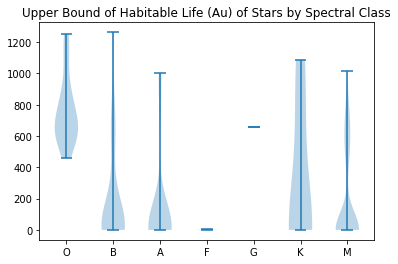

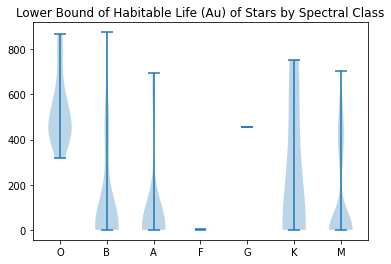

In [69]:
#violin plot for the magnitude by spectral class
fig, ax = plt.subplots()
ax.set_xticks([1, 2, 3, 4, 5, 6, 7], allClasses)
ax.violinplot(sortedMagnitude)
plt.title("Magnitude of Stars by Spectral Class")
plt.show()

#violin plot for the temperature by spectral class
fig, ax = plt.subplots()
ax.set_xticks([1, 2, 3, 4, 5, 6, 7], allClasses)
ax.violinplot(sortedTemp)
plt.title("Temperature(K) of Stars by Spectral Class")
plt.show()

#violin plot for the upper bound by spectral class
fig, ax = plt.subplots()
ax.set_xticks([1, 2, 3, 4, 5, 6, 7], allClasses)
ax.violinplot(sortedUpper)
plt.title("Upper Bound of Habitable Life (Au) of Stars by Spectral Class")
plt.show()

#violin plot for the lower bound by spectral class
fig, ax = plt.subplots()
ax.set_xticks([1, 2, 3, 4, 5, 6, 7], allClasses)
ax.violinplot(sortedLower)
plt.title("Lower Bound of Habitable Life (Au) of Stars by Spectral Class")
plt.show()

In [70]:
normMagnitude = []
normTemperature = []

for i in range(len(lowerHabitable)) :
    #normalizes the magnitude to the respective lower bound of the star's habitable zone
    normMagnitude.append(magnitude[i]/lowerHabitable[i])
    #normalizes the temperature to the respective lower bound of the star's habitable zone
    normTemperature.append(temp[i]/(lowerHabitable[i] * 5778))
    
# creates 2d table of the metrics sorted by class
sortedNormTemp = []
sortedNormMagnitude = []

for star in allClasses:
    newMagnitude = []
    newTemp = []
    for i in range(len(starClass)):
        if starClass[i] == star:
            newMagnitude.append(normMagnitude[i])
            newTemp.append(normTemperature[i])
    
    sortedNormTemp.append(newTemp)
    sortedNormMagnitude.append(newMagnitude)



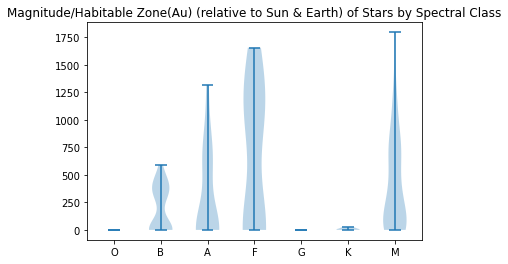

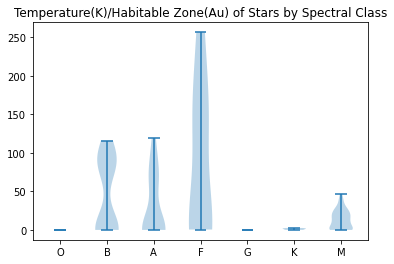

In [71]:
#violin plot for the magnitude by spectral class
fig, ax = plt.subplots()
ax.set_xticks([1, 2, 3, 4, 5, 6, 7], allClasses)
ax.violinplot(sortedNormMagnitude)
plt.title("Magnitude/Habitable Zone(Au) (relative to Sun & Earth) of Stars by Spectral Class")
plt.show()

#violin plot for the temperature by spectral class
fig, ax = plt.subplots()
ax.set_xticks([1, 2, 3, 4, 5, 6, 7], allClasses)
ax.violinplot(sortedNormTemp)
plt.title("Temperature(K)/Habitable Zone(Au) of Stars by Spectral Class")
plt.show()

In [72]:
#Counts the number of stars for each class
for i in sortedLower:
    print(len(i))
    

40
46
19
17
1
6
111
